## Part 1

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
human_freedom_index =Table.read_table('hfi_cc_2018.csv')

c:\users\mesutkoc\appdata\local\programs\python\python36\lib\site-packages\datascience\tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


In [4]:
human_freedom_index.show(5)

year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
2016,ALB,Albania,Eastern Europe,6.6615,4.54724,4.66651,5.29175,8.92043,10,10,10,10,10,10,10,7.5,5,5,5,7.5,8.80681,5,10,5,6.66667,nan,nan,10,9.56667,8.01111,9.19259,10,10,nan,nan,10,nan,nan,10,nan,nan,10,10,10,10,5,5.25,10,10,10,8.60714,0,10,10,10,10,10,10,5,6.25,7.59628,57,8.23235,7.5099,8,9,7,8,7.93556,2.66822,3.14546,4.51223,8.33333,4.16667,4.38744,6.48529,6.9335,6.2154,0.948718,5.07181,8.98645,9.48458,9.7436,10,9.55366,9.62667,9.24,8.024,8.96356,5.57448,9.40533,7.4899,10,6.30611,4.61538,8.29692,6.40614,8.2149,5,7.29569,9,7.09856,5.56667,5.3964,6.23486,8,6.29974,10,6.91628,6.07217,6,9.71386,4.0502,7.32458,7.07437,6.70586,6.9069,7.54,34,7.56814,48,2
2016,DZA,Algeria,Middle East & North Africa,nan,nan,nan,3.81957,9.45625,10,9.29403,5,9.92612,9.99015,8.84206,10,7.5,0,0,0,5.83333,8.04388,5,5,5,5,nan,nan,5,6.87333,2.96111,4.94481,5,5,nan,nan,5,nan,nan,5,nan,nan,5,5,10,10,2.66667,4,10,7.5,7.5,7.38095,nan,0,5,2.5,0,0,0,0,0.833333,5.28177,147,2.15,7.81713,0,7,2,4.5,3.61678,4.1867,4.32711,4.68995,4.16667,5,4.50754,6.62669,6.13684,6.73738,0.820513,4.69074,6.95596,8.33915,8.72046,5,7.25389,8.48,6.22,5.9176,6.87253,4.96259,0,2.48129,5.56391,3.66483,0,1.10626,1.59036,4.12702,0,5.30153,10,5.10051,5.56667,3.89691,5.95832,6,7.75518,1,5.02951,3.72234,1.77778,9.24307,3.76552,8.5235,7.02953,5.67696,5.26899,4.99,159,5.13589,155,4
2016,AGO,Angola,Sub-Saharan Africa,nan,nan,nan,3.45181,8.06026,5,10,7.5,10,

## Part 2

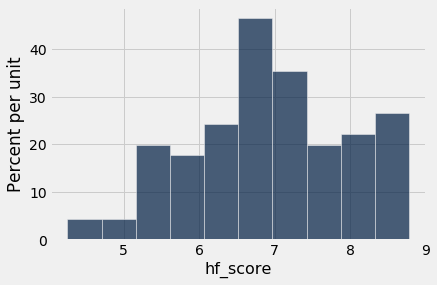

In [5]:
# Histogram

histogram=human_freedom_index.take(np.arange(100)).select('hf_score')
histogram.hist("hf_score")

In [6]:
min_value = min(human_freedom_index.column('hf_score'))
max_value = max(human_freedom_index.column('hf_score'))

In [7]:
print(min_value)
print(max_value)

3.765826877
9.126312939


## Part 3

In [19]:
countries_8hfs = human_freedom_index.where('hf_score',are.above_or_equal_to(8)).select("countries", "pf_religion", "pf_ss_women",
"pf_movement")

In [24]:
countries_8hfs.show()

countries,pf_religion,pf_ss_women,pf_movement
Australia,9.07593,10,10
Austria,7.92519,10,10
Belgium,8.13148,10,10
Canada,9.0037,10,10
Chile,9.26593,8.33333,10
Cyprus,7.15926,10,10
Czech Rep.,7.76444,10,10
Denmark,7.70222,10,10
Estonia,8.32963,10,10
Finland,7.90148,10,10


## Part 4

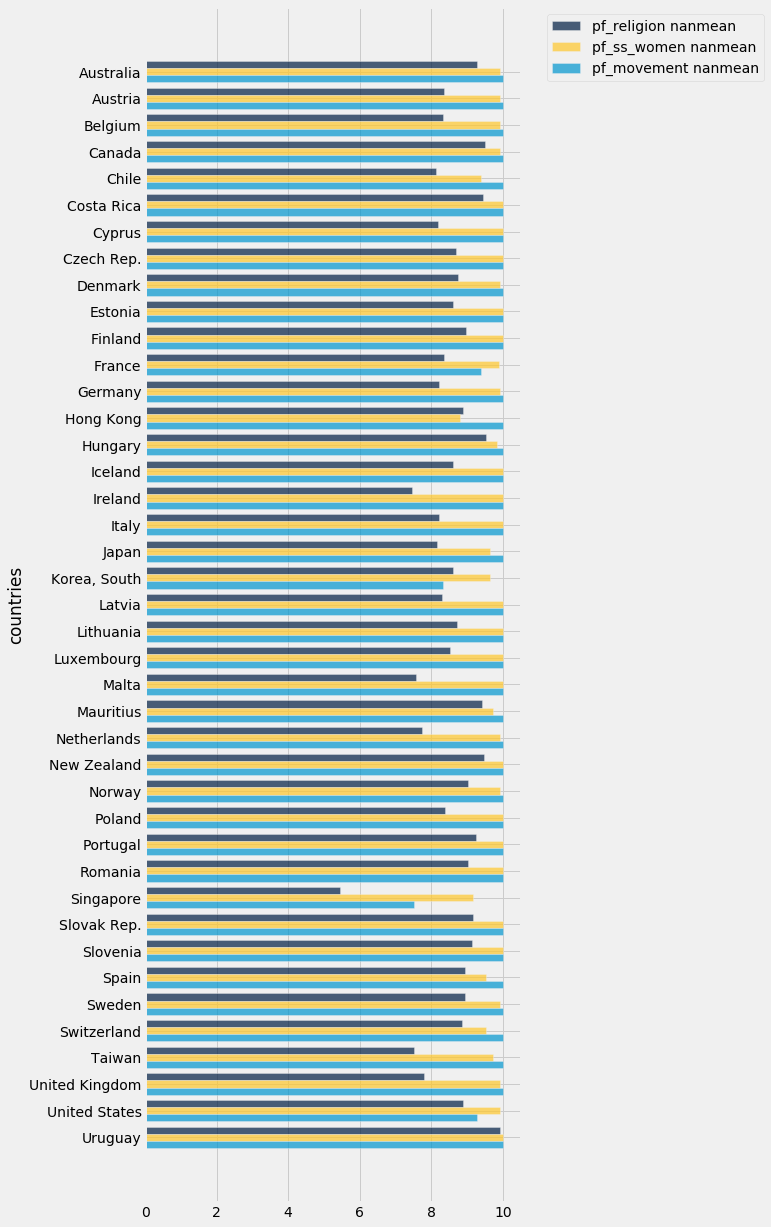

In [25]:
# Barh Graph 
countries_8hfs.group('countries',np.nanmean).barh('countries')


## Part 5

In [26]:
highest2016_hf_score = human_freedom_index.select('year','countries','hf_score').sort('hf_score',descending=True).where('year',2016).show(1)
lowest2016_hf_score = human_freedom_index.select('year','countries','hf_score').sort('hf_score',descending=False).where('year',2016).show(1)

year,countries,hf_score
2016,New Zealand,8.88741


year,countries,hf_score
2016,Syria,3.76583


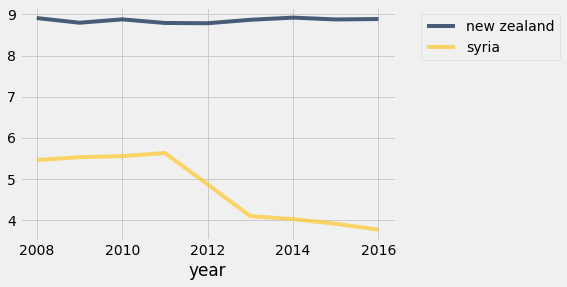

In [27]:
# year vs. hf_score line graph of both highest and lowest hf_score. (they should be in the same graph)
new_zealand=human_freedom_index.where('countries','New Zealand').select('year','hf_score')
syria=human_freedom_index.where('countries','Syria').select('year','hf_score')
new_zealand.join('year',syria).relabeled("hf_score","new zealand").relabeled("hf_score_2","syria").plot("year")

## Part 6

In [56]:
# Pivot table
human_freedom_index.where('hf_score',are.above(8.6)).pivot('year','countries',values='hf_score',collect=list)

countries,2008,2009,2010,2011,2012,2013,2014,2015,2016
Australia,[8.68602024],[8.63031277],[8.64269287],None,None,None,[8.67234214],[8.60737264],None
Canada,[8.65300157],[8.63899935],[8.64011509],[8.60799282],None,[8.62775213],[8.7195527],None,None
Denmark,[8.68717383],None,[8.62938103],None,None,None,[8.60784027],None,None
Finland,[8.65387075],[8.61026907],[8.64524109],[8.67468531],[8.62545225],None,[8.63835254],None,None
Hong Kong,[9.12631294],[9.05265309],[9.02844791],[9.02789088],[8.99908567],[8.97181474],[8.8924555],[8.85758085],[8.7768398]
Ireland,None,None,None,None,None,None,None,[8.64552481],None
New Zealand,[8.91054247],[8.79771703],[8.87907673],[8.79173047],[8.78463904],[8.86858462],[8.92138582],[8.87689004],[8.88740958]
Switzerland,[8.77443651],[8.79225829],[8.81814144],[8.77716612],[8.76010516],[8.71526192],[8.8069321],[8.81445818],[8.78775905]


## Part 7

In [57]:
world_indexes = Table.read_table('kaggle.csv')

In [58]:
world_indexes.show(5)

Id,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
Norway,0.943877,26.83,7.834,100,0.778925,9.19288,11.9146,5.22,104.194,86.9562,1.51,11.3,100,17.4926,67.0359,5.2,0.512555,27.9734,57.2718,0.75,0.067443,1.81516,21.8527,317.498,62448,22.6445,64992.3,0,2.2,2.3,4963,-3.37449,96.3,26.8,81.6,13,4,12.631,116.51,9.0195,6,37.39,12.3478,0.186818,97.0596,98.8506,99.437,1.51155,72,11.4674,6.55284,9.57301,9.59064,0.013,0.154407,47.7527,1.65474,111.061,39.645,13.7726,31.7984,74.1011,27.2881,0.14,2.8
Australia,0.934958,34.01,12.059,100,1.09035,16.5192,-4.56181,30.27,107.789,158.841,1.36,6.3,100,20.2211,40.9957,5.2,3.33041,19.1937,95.3678,3.93,0.11013,-0.0174097,17.7467,990.721,42831.1,28.3274,42260.6,33.4066,1.1,3.4,6382,17.1321,84.56,39.9,82.4,16.1,6,12.9634,131.23,3.81985,6.5,32.73,1337.39,8.98455,94.4489,107.777,104.838,6.11862,130,-6.78901,5.11041,8.9987,12.303,0.025,0.157953,4.6322,2.38562,135.535,30.531,27.7118,65.3337,86.3341,21.3614,0.19,4
Switzerland,0.929613,32.35,1.9,100,-1.10125,4.62523,8.56742,16.72,99.3172,173.429,1.35,6.6,100,15.7904,132.183,5.1,-1.19333,31.6125,51.0756,12.3133,0.0278476,1.44704,10.9635,442.037,54697.5,23.4173,56431.1,0,0.6,3.6,8967,12.615,87,39,83,13.6,6,12.8235,140.54,0.0139729,8,39.38,73.0822,0.456751,95.7491,99.5225,102

## Part 8

In [73]:
world_indexes = Table.read_table('kaggle.csv').relabeled('Id','countries')

In [74]:
world_indexes.show(5)

countries,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
Norway,0.943877,26.83,7.834,100,0.778925,9.19288,11.9146,5.22,104.194,86.9562,1.51,11.3,100,17.4926,67.0359,5.2,0.512555,27.9734,57.2718,0.75,0.067443,1.81516,21.8527,317.498,62448,22.6445,64992.3,0,2.2,2.3,4963,-3.37449,96.3,26.8,81.6,13,4,12.631,116.51,9.0195,6,37.39,12.3478,0.186818,97.0596,98.8506,99.437,1.51155,72,11.4674,6.55284,9.57301,9.59064,0.013,0.154407,47.7527,1.65474,111.061,39.645,13.7726,31.7984,74.1011,27.2881,0.14,2.8
Australia,0.934958,34.01,12.059,100,1.09035,16.5192,-4.56181,30.27,107.789,158.841,1.36,6.3,100,20.2211,40.9957,5.2,3.33041,19.1937,95.3678,3.93,0.11013,-0.0174097,17.7467,990.721,42831.1,28.3274,42260.6,33.4066,1.1,3.4,6382,17.1321,84.56,39.9,82.4,16.1,6,12.9634,131.23,3.81985,6.5,32.73,1337.39,8.98455,94.4489,107.777,104.838,6.11862,130,-6.78901,5.11041,8.9987,12.303,0.025,0.157953,4.6322,2.38562,135.535,30.531,27.7118,65.3337,86.3341,21.3614,0.19,4
Switzerland,0.929613,32.35,1.9,100,-1.10125,4.62523,8.56742,16.72,99.3172,173.429,1.35,6.6,100,15.7904,132.183,5.1,-1.19333,31.6125,51.0756,12.3133,0.0278476,1.44704,10.9635,442.037,54697.5,23.4173,56431.1,0,0.6,3.6,8967,12.615,87,39,83,13.6,6,12.8235,140.54,0.0139729,8,39.38,73.0822,0.456751,95.7491,99.5

## Part 9

In [75]:
hfi_wi = human_freedom_index.group('countries',np.nanmean).join('countries',world_indexes)

In [76]:
hfi_wi.show(5)

countries,year nanmean,ISO_code nanmean,region nanmean,pf_rol_procedural nanmean,pf_rol_civil nanmean,pf_rol_criminal nanmean,pf_rol nanmean,pf_ss_homicide nanmean,pf_ss_disappearances_disap nanmean,pf_ss_disappearances_violent nanmean,pf_ss_disappearances_organized nanmean,pf_ss_disappearances_fatalities nanmean,pf_ss_disappearances_injuries nanmean,pf_ss_disappearances nanmean,pf_ss_women_fgm nanmean,pf_ss_women_missing nanmean,pf_ss_women_inheritance_widows nanmean,pf_ss_women_inheritance_daughters nanmean,pf_ss_women_inheritance nanmean,pf_ss_women nanmean,pf_ss nanmean,pf_movement_domestic nanmean,pf_movement_foreign nanmean,pf_movement_women nanmean,pf_movement nanmean,pf_religion_estop_establish nanmean,pf_religion_estop_operate nanmean,pf_religion_estop nanmean,pf_religion_harassment nanmean,pf_religion_restrictions nanmean,pf_religion nanmean,pf_association_association nanmean,pf_association_assembly nanmean,pf_association_political_establish nanmean,pf_association_political_operate nanmean,pf_association_political nanmean,pf_association_prof_establish nanmean,pf_association_prof_operate nanmean,pf_association_prof nanmean,pf_association_sport_establish nanmean,pf_association_sport_operate nanmean,pf_association_sport nanmean,pf_association nanmean,pf_expression_killed nanmean,pf_expression_jailed nanmean,pf_expression_influence nanmean,pf_expression_control nanmean,pf_expression_cable nanmean,pf_expression_newspapers nanmean,pf_expression_internet nanmean,pf_expression nanmean,pf_identity_legal nanmean,pf_identity_parental_marriage nanmean,pf_identity_parental_divorce nanmean,pf_identity_parental nanmean,pf_identity_sex_male nanmean,pf_identity_sex_female nanmean,pf_identity_sex nanmean,pf_identity_divorce nanmean,pf_identity nanmean,pf_score nanmean,pf_rank nanmean,ef_government_consumption nanmean,ef_government_transfers nanmean,ef_government_enterprises nanmean,ef_government_tax_income nanmean,ef_government_tax_payroll nanmean,ef_government_tax nanmean,ef_government nanmean,ef_legal_judicial nanmean,ef_legal_courts nanmean,ef_legal_protection nanmean,ef_legal_military nanmean,ef_legal_integrity nanmean,ef_legal_enforcement nanmean,ef_legal_restrictions nanmean,ef_legal_police nanmean,ef_legal_crime nanmean,ef_legal_gender nanmean,ef_legal nanmean,ef_money_growth nanmean,ef_money_sd nanmean,ef_money_inflation nanmean,ef_money_currency nanmean,ef_money nanmean,ef_trade_tariffs_revenue nanmean,ef_trade_tariffs_mean nanmean,ef_trade_tariffs_sd nanmean,ef_trade_tariffs nanmean,ef_trade_regulatory_nontariff nanmean,ef_trade_regulatory_compliance nanmean,ef_trade_regulatory nanmean,ef_trade_black nanmean,ef_trade_movement_foreign nanmean,ef_trade_movement_capital nanmean,ef_trade_movement_visit nanmean,ef_trade_movement nanmean,ef_trade nanmean,ef_regulation_credit_ownership nanmean,ef_regulation_credit_private nanmean,ef_regulation_credit_interest nanmean,ef_regulation_credit nanmean,ef_regulation_labor_minwage nanmean,ef_regulation_labor_firing nanmean,ef_regulation_labor_bargain nanmean,ef_regulation_labor_hours nanmean,ef_regulation_labor_dismissal nanmean,ef_regulation_labor_conscription nanmean,ef_regulation_labor nanmean,ef_regulation_business_adm nanmean,ef_regulation_business_bureaucracy nanmean,ef_regulation_business_start nanmean,ef_regulation_business_bribes nanmean,ef_regulation_business_licensing nanmean,ef_regulation_business_compliance nanmean,ef_regulation_business nanmean,ef_regulation nanmean,ef_score nanmean,ef_rank nanmean,hf_score nanmean,hf_rank nanmean,hf_quartile nanmean,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domes

## Part 10

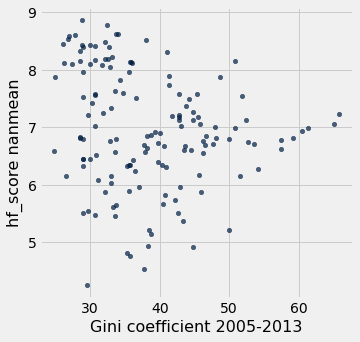

In [77]:
# Scatter Plot
hfi_wi.scatter('Gini coefficient 2005-2013','hf_score nanmean')

## Part 11

In [78]:
average_gini = np.average(hfi_wi.column('Gini coefficient 2005-2013'))

In [79]:
print(average_gini)

38.29653729479452


In [80]:
def labelGini(value):
        if value >=average_gini:
            #print('Gini High')
            return('Gini High')
        else:
            #print('Gini Low')
            return('Gini Low')


In [81]:
new_column=hfi_wi.apply(labelGini,'Gini coefficient 2005-2013')

In [82]:
hfi_wi= hfi_wi.with_column('Gini Label',new_column)

In [83]:
hfi_wi.show(5)

countries,year nanmean,ISO_code nanmean,region nanmean,pf_rol_procedural nanmean,pf_rol_civil nanmean,pf_rol_criminal nanmean,pf_rol nanmean,pf_ss_homicide nanmean,pf_ss_disappearances_disap nanmean,pf_ss_disappearances_violent nanmean,pf_ss_disappearances_organized nanmean,pf_ss_disappearances_fatalities nanmean,pf_ss_disappearances_injuries nanmean,pf_ss_disappearances nanmean,pf_ss_women_fgm nanmean,pf_ss_women_missing nanmean,pf_ss_women_inheritance_widows nanmean,pf_ss_women_inheritance_daughters nanmean,pf_ss_women_inheritance nanmean,pf_ss_women nanmean,pf_ss nanmean,pf_movement_domestic nanmean,pf_movement_foreign nanmean,pf_movement_women nanmean,pf_movement nanmean,pf_religion_estop_establish nanmean,pf_religion_estop_operate nanmean,pf_religion_estop nanmean,pf_religion_harassment nanmean,pf_religion_restrictions nanmean,pf_religion nanmean,pf_association_association nanmean,pf_association_assembly nanmean,pf_association_political_establish nanmean,pf_association_political_operate nanmean,pf_association_political nanmean,pf_association_prof_establish nanmean,pf_association_prof_operate nanmean,pf_association_prof nanmean,pf_association_sport_establish nanmean,pf_association_sport_operate nanmean,pf_association_sport nanmean,pf_association nanmean,pf_expression_killed nanmean,pf_expression_jailed nanmean,pf_expression_influence nanmean,pf_expression_control nanmean,pf_expression_cable nanmean,pf_expression_newspapers nanmean,pf_expression_internet nanmean,pf_expression nanmean,pf_identity_legal nanmean,pf_identity_parental_marriage nanmean,pf_identity_parental_divorce nanmean,pf_identity_parental nanmean,pf_identity_sex_male nanmean,pf_identity_sex_female nanmean,pf_identity_sex nanmean,pf_identity_divorce nanmean,pf_identity nanmean,pf_score nanmean,pf_rank nanmean,ef_government_consumption nanmean,ef_government_transfers nanmean,ef_government_enterprises nanmean,ef_government_tax_income nanmean,ef_government_tax_payroll nanmean,ef_government_tax nanmean,ef_government nanmean,ef_legal_judicial nanmean,ef_legal_courts nanmean,ef_legal_protection nanmean,ef_legal_military nanmean,ef_legal_integrity nanmean,ef_legal_enforcement nanmean,ef_legal_restrictions nanmean,ef_legal_police nanmean,ef_legal_crime nanmean,ef_legal_gender nanmean,ef_legal nanmean,ef_money_growth nanmean,ef_money_sd nanmean,ef_money_inflation nanmean,ef_money_currency nanmean,ef_money nanmean,ef_trade_tariffs_revenue nanmean,ef_trade_tariffs_mean nanmean,ef_trade_tariffs_sd nanmean,ef_trade_tariffs nanmean,ef_trade_regulatory_nontariff nanmean,ef_trade_regulatory_compliance nanmean,ef_trade_regulatory nanmean,ef_trade_black nanmean,ef_trade_movement_foreign nanmean,ef_trade_movement_capital nanmean,ef_trade_movement_visit nanmean,ef_trade_movement nanmean,ef_trade nanmean,ef_regulation_credit_ownership nanmean,ef_regulation_credit_private nanmean,ef_regulation_credit_interest nanmean,ef_regulation_credit nanmean,ef_regulation_labor_minwage nanmean,ef_regulation_labor_firing nanmean,ef_regulation_labor_bargain nanmean,ef_regulation_labor_hours nanmean,ef_regulation_labor_dismissal nanmean,ef_regulation_labor_conscription nanmean,ef_regulation_labor nanmean,ef_regulation_business_adm nanmean,ef_regulation_business_bureaucracy nanmean,ef_regulation_business_start nanmean,ef_regulation_business_bribes nanmean,ef_regulation_business_licensing nanmean,ef_regulation_business_compliance nanmean,ef_regulation_business nanmean,ef_regulation nanmean,ef_score nanmean,ef_rank nanmean,hf_score nanmean,hf_rank nanmean,hf_quartile nanmean,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domes

## Part 12

In [96]:
# Pivot Table
hfi_wi.select('countries','Gini Label','hf_score nanmean').pivot('Gini Label','countries',values='hf_score nanmean',collect=max)

countries,Gini High,Gini Low
Albania,0,7.52291
Algeria,5.1408,0
Angola,5.49958,0
Argentina,6.67706,0
Armenia,0,7.41327
Australia,0,8.6132
Austria,0,8.42414
Azerbaijan,0,6.15398
Bahamas,0,7.55852
Bahrain,0,6.80051
